<a href="https://colab.research.google.com/github/alirustama/Data-Analyst/blob/master/ExploratoryData_Analysis_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as plt
ads= pd.read_csv('data.csv')
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB


In [ ]:
ads.head(10)

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71
5,01-08-2020,campaign 1,adgroup 2,ad 2,7,2,0.04,0,0.00
6,01-08-2020,campaign 1,adgroup 4,ad 2,6,3,0.05,0,0.00
7,01-08-2020,campaign 1,adgroup 1,ad 3,129,52,0.58,0,0.00
8,01-08-2020,campaign 1,adgroup 3,ad 3,104,56,0.56,0,0.00
9,01-08-2020,campaign 1,adgroup 4,ad 3,6,5,0.05,0,0.00


In [ ]:
ads.tail(10)

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
4561,28-02-2021,campaign 1,adgroup 2,ad 7,5,2,0.02,0,0.00
4562,28-02-2021,campaign 1,adgroup 1,ad 7,78,37,0.50,2,243.08
4563,28-02-2021,campaign 1,adgroup 3,ad 7,32,14,0.15,0,0.00
4564,28-02-2021,campaign 1,adgroup 3,ad 8,261,106,1.37,3,404.17
4565,28-02-2021,campaign 1,adgroup 1,ad 10,10,2,0.02,0,0.00
4566,28-02-2021,campaign 1,adgroup 3,ad 55,19,6,0.07,0,0.00
4567,28-02-2021,campaign 1,adgroup 4,ad 55,1,0,0.00,0,0.00
4568,28-02-2021,campaign 1,adgroup 3,ad 56,16,8,0.12,1,93.20
4569,28-02-2021,campaign 1,adgroup 1,ad 56,37,13,0.23,0,0.00
4570,28-02-2021,campaign 1,adgroup 1,ad 55,19,10,0.14,0,0.00


In [ ]:
ads.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def data_pipeline(data, output):
    """
    Preprocessing pipeline part 1: Transform full data frame
    Arguments: Pandas dataframe, output column (dependent variable)
    Returns: Modified dataframe
    """
    data = cost_per_metric(data, output) if 'cost_per' in output \
                                         else data[data[output] > 0]
    data = drop_columns(data, output, threshold=.5)
    data = data.dropna(axis='index')
    data = create_other_buckets(data, threshold=.1)
    data = one_hot_encode(data)
    return data

def split_pipeline(data, output):
    """
    Preprocessing pipeline part 2: Split data into variables
    Arguments: Pandas dataframe, output column (dependent variable)
    Returns: List of scaled and unscaled dependent and independent variables
    """
    y, X = data.iloc[:, 0], data.iloc[:, 1:]
    X_train, X_test, y_train, y_test = train_test_split(
        data.drop([output], axis=1), data[output], test_size=.2, random_state=1)
    X_scaled, y_scaled, X_train_scaled, y_train_scaled, X_test_scaled, \
        y_scaler = scale(X, y, X_train, y_train, X_test)
    return [X, y, X_train, y_train, X_tesmodel = sm.OLS(self.y_train, sm.add_constant(self.X_train)).fit()
print(model.summary())t, y_test, X_scaled, y_scaled,
            X_train_scaled, y_train_scaled, X_test_scaled, y_scaler]

def cost_per_metric(data, output):
    """Create 'cost_per_...' column and remove data where output is 0 or NaN"""
    metric = output.replace('cost_per_', '') + 's'
    data = data[data[metric] > 0]
    data.insert(0, output, [row['cost'] / row[metric]
                            for index, row in data.iterrows()])
    return data

def drop_columns(data, output, threshold=0.5):
    """Drop columns with more than threshold missing data"""
    rows = data[output].count()
    for column in list(data.columns):
        if data[column].count() < rows * threshold:
            data = data.drop([column], axis=1)
    return data

def create_other_buckets(data, threshold=0.1):
    """Put rare categorical values into other bucket"""
    categoricals = list(data.select_dtypes(include='object').columns)
    for column in categoricals:
        results = data[column].count()
        groups = data.groupby([column])[column].count()
        for bucket in groups.index:
            if groups.loc[bucket] < results * threshold:
                data.loc[data[column] =g=sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),annot=True ,fmt=".2f", cmap="coolwarm")= bucket, column] = 'other'
    return data

def one_hot_encode(data):
    """One-hot encode categorical data"""
    categoricals = list(data.select_dtypes(include='object').columns)
    for column in categoricals:
        if 'other' in data[column].unique():
            data = pd.get_dummies(data, columns=[column], prefix=[column],
                                  drop_first=False)
            data = data.drop([column + '_other'], axis=1)
        else:
            data = pd.get_dummies(data, columns=[column], prefix=[column],
                                  drop_first=True)
    return data

def scale(X, y, X_train, y_train, X_test):
    """Scale dependent and independent variables"""
    X_scaler, y_scaler = StandardScaler(), StandardScaler()

    X_scaled = X_scaler.fit_transform(X.values.astype(float))
    y_scaled = y_scaler.fit_transform(
        y.values.astype(float).reshape(-1, 1)).flatten()

    X_train_scaled = pd.DataFrame(data=X_scaler.transform(
        X_train.values.astype(float)), columns=X.columns)
    y_train_scaled = y_scaler.transform(
        y_train.values.astype(float).reshape(-1, 1)).flatten()

    X_test_scaled = pd.DataFrame(data=X_scaler.transform(
        X_test.values.astype(float)), columns=X.columns)

    return [X_scaled, y_scaled, X_train_scaled, y_train_scaled,
            X_test_scaled, y_scaler]


In [ ]:
ads['CTR'] = (ads['clicks']/ads['impressions']*100)
ads['CPC'] = ads['cost']/ads['clicks']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

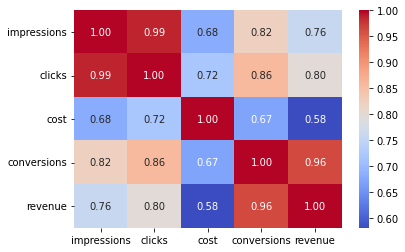

In [ ]:
g=sns.heatmap(ads[["impressions","clicks","cost","conversions","revenue"]].corr(),annot=True ,fmt=".2f", cmap="coolwarm")






In [ ]:
ads["campaign"].unique()

array(['campaign 1'], dtype=object)

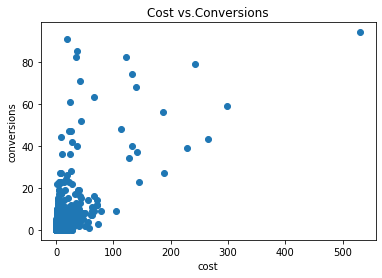

In [ ]:
plt.scatter(ads["cost"], ads["conversions"])
plt.title("Cost vs.Conversions")
plt.xlabel("cost")
plt.ylabel("conversions")
plt.show()

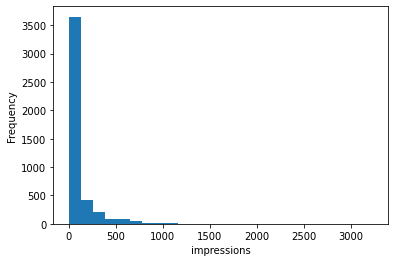

In [ ]:
plt.hist(ads['impressions'], bins = 25)
plt.xlabel("impressions")
plt.ylabel("Frequency")
plt.show()

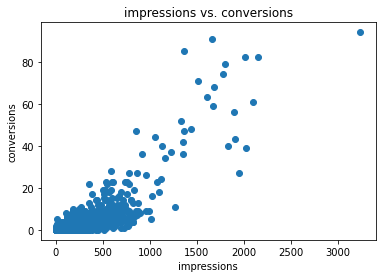

In [ ]:
plt.scatter(ads["impressions"], ads["conversions"])
plt.title("impressions vs. conversions")
plt.xlabel("impressions")
plt.ylabel("conversions")
plt.show()

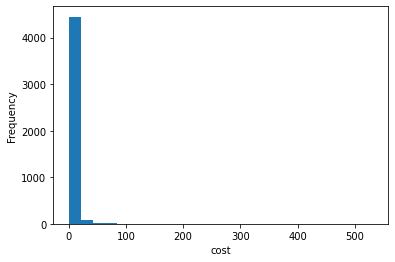

In [ ]:
plt.hist(ads['cost'], bins = 25)
plt.xlabel("cost")
plt.ylabel("Frequency")
plt.show()

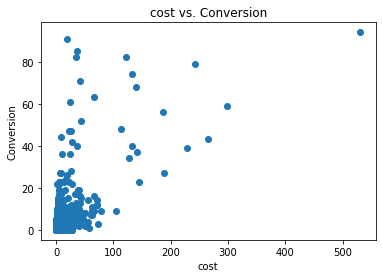

In [ ]:
plt.scatter(ads["cost"], ads["conversions"])
plt.title("cost vs. Conversion")
plt.xlabel("cost")
plt.ylabel("Conversion")
plt.show()

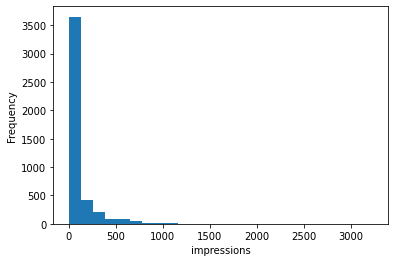

In [ ]:
plt.hist(ads['impressions'], bins = 25)
plt.xlabel("impressions")correlation
plt.ylabel("Frequency")
plt.show()

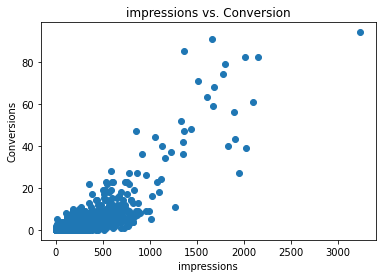

In [ ]:
plt.scatter(ads["impressions"], ads["conversions"])
plt.title("impressions vs. Conversion")
plt.xlabel("impressions")
plt.ylabel("Conversions")
plt.show()

# **2. correlation**

In [93]:
import warnings  
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization


In [ ]:
ads = pd.read_csv('data.csv', index_col=['date'], parse_dates=['date'])
cost = pd.read_csv('data.csv', index_col=['date'], parse_dates=['date'])

In [ ]:
correlations = ads.corr()
print(correlations)

             impressions    clicks      cost  conversions   revenue
impressions     1.000000  0.987514  0.682811     0.822149  0.759671
clicks          0.987514  1.000000  0.719925     0.856941  0.798282
cost            0.682811  0.719925  1.000000     0.672202  0.581662
conversions     0.822149  0.856941  0.672202     1.000000  0.964096
revenue         0.759671  0.798282  0.581662     0.964096  1.000000


In [ ]:
ads.corr()

,impressions,clicks,cost,conversions,revenue
impressions,1.000000,0.987514,0.682811,0.822149,0.759671
clicks,0.987514,1.000000,0.719925,0.856941,0.798282
cost,0.682811,0.719925,1.000000,0.672202,0.581662
conversions,0.822149,0.856941,0.672202,1.000000,0.964096
revenue,0.759671,0.798282,0.581662,0.964096,1.000000


In [ ]:
print(correlations["cost"])

impressions    0.682811
clicks         0.719925
cost           1.000000
conversions    0.672202
revenue        0.581662
Name: cost, dtype: float64


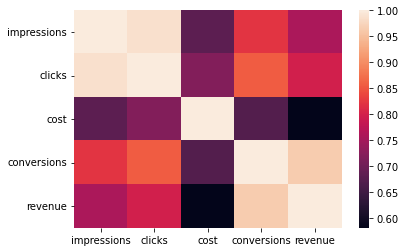

In [ ]:
sns.heatmap(correlations)
plt.show()

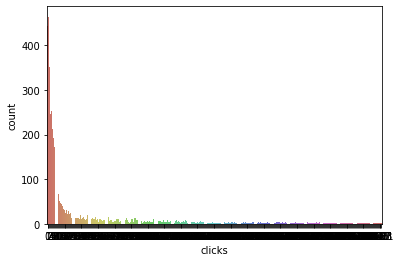

In [ ]:


sns.countplot(x='clicks',data=ads, palette='hls')
plt.show();

In [ ]:
ads['clicks'].value_counts()/len(ads)

1       0.101510
0       0.097134
2       0.076788
4       0.055130
3       0.053818
          ...   
809     0.000219
797     0.000219
761     0.000219
713     0.000219
1177    0.000219
Name: clicks, Length: 355, dtype: float64

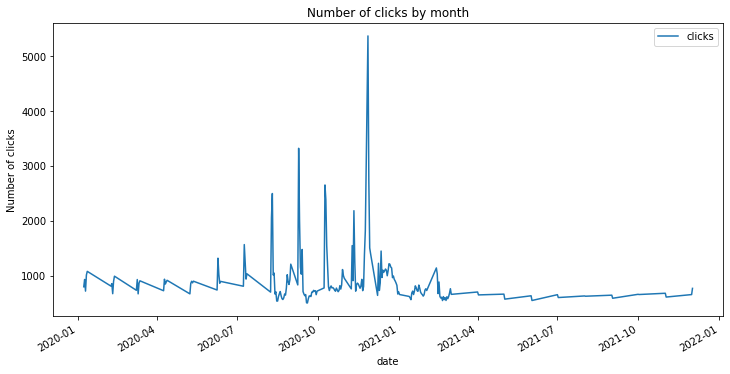

In [ ]:
ads.groupby('date').agg({'clicks':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by month');

In [ ]:
train['hour_of_day'] = train.hour.apply(lambda x: x.hour)
train.groupby('hour_of_day').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day');

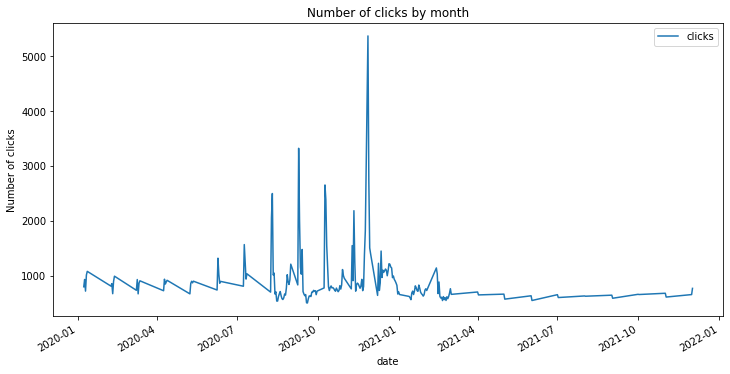

In [ ]:
ads.groupby('date').agg({'clicks':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by month');

In [88]:
print(ads.value_counts()/len(ads))

campaign    adgroup    ad     impressions  clicks  cost  conversions  revenue
campaign 1  adgroup 4  ad 10  1            0       0.00  0            0.0        0.008095
            adgroup 2  ad 1   1            0       0.00  0            0.0        0.005250
                       ad 3   1            0       0.00  0            0.0        0.004375
                       ad 7   1            0       0.00  0            0.0        0.003719
            adgroup 4  ad 1   1            0       0.00  0            0.0        0.003063
                                                                                   ...   
            adgroup 3  ad 5   20           7       0.08  0            0.0        0.000219
                              19           13      0.23  0            0.0        0.000219
                                           11      0.12  0            0.0        0.000219
                                           10      0.46  0            0.0        0.000219
            adgroup 1 